# required lib

In [1]:
!pip install gensim==3.8.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.9 MB/s eta 0:00:00


In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

df_sentiment = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_text.csv') # only FYO
df_sentiment_large = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_text_large.csv') # all 20 quarters

In [5]:
print(df_sentiment.shape)
print(df_sentiment_large.shape) # to big to handle

(1741, 7)
(139892, 7)


# press and transcripts FYO

In [6]:
import pandas as pd

df_sentiment['Activation Date'] = pd.to_datetime(df_sentiment['Activation Date'])

# Extract the year and month from the 'Activation Date' column
df_sentiment['Year'] = df_sentiment['Activation Date'].dt.year
df_sentiment['Month'] = df_sentiment['Activation Date'].dt.month

# Optionally, you can drop the original 'Activation Date' column if you no longer need it
#df_sentiment_large.drop('Activation Date', axis=1, inplace=True)

# Display the updated DataFrame
df_sentiment

,Instrument,Activation Date,Guidance Measure,Guidance High Value,Guidance Low Value,Guidance Text,The Doc Type,Year,Month
0,POOL.OQ,2022-10-20 11:00:00+00:00,Revenue,5.932538e+09,5.808943e+09,I mean you've had years of successful capacity...,Transcript,2022.0,10.0
1,POOL.OQ,2023-02-16 11:00:00+00:00,EBIT,NaN,NaN,In view of the potential for flat to slightly ...,Transcript,2023.0,2.0
2,CHRW.OQ,2022-05-25 10:55:00+00:00,Revenue,NaN,NaN,"I mean throughout the balance of this year, sh...",Transcript,2022.0,5.0
3,CHRW.OQ,2023-04-26 17:00:00+00:00,EBITDA,NaN,NaN,"As you would expect, the cash that we used to ...",Transcript,2023.0,4.0
4,CHRW.OQ,2022-07-27 17:00:00+00:00,EBIT,NaN,NaN,And so while the market will undoubtedly shift...,Transcript,2022.0,7.0
...,...,...,...,...,...,...,...,...,...
1736,AVY.N,2023-04-26 13:00:00+00:00,Revenue,NaN,NaN,We also expect volume to recover post the inve...,Transcript,2023.0,4.0
1737,AVY.N,2023-04-26 13:00:00+00:00,Revenue,NaN,NaN,We also expect volume to recover post the inve...,Transcript,2023.0,4.0
1738,AVY.N,2023-02-02 06:45:00+00:00,Revenue,NaN,NaN,to continue our long track record of earnings ...,Press Release,2023.0,2.0
1739,AVY.N,2023-04-26 06:45:00+00:00,EBITDA,NaN,NaN,* The company anticipates label destocking to ...,Press Release,2023.0,4.0


In [7]:
import pandas as pd
# Group by 'Year' and 'Month' and count the number of unique instruments
count_per_year_month = df_sentiment.groupby(['Year', 'Month'])['Instrument'].nunique().reset_index()

# Rename the column to 'Instrument Count'
count_per_year_month.rename(columns={'Instrument': 'Instrument Count'}, inplace=True)

# Display the count per year and month
count_per_year_month

,Year,Month,Instrument Count
0,2019.0,2.0,1
1,2019.0,3.0,1
2,2020.0,6.0,1
3,2021.0,1.0,2
4,2021.0,2.0,1
5,2021.0,3.0,2
6,2021.0,4.0,1
7,2021.0,6.0,2
8,2021.0,7.0,1
9,2021.0,10.0,2


# press and trascripts lasr 20 quarters

In [17]:
import pandas as pd

df_sentiment_large['Activation Date'] = pd.to_datetime(df_sentiment_large['Activation Date'])

# Extract the year and month from the 'Activation Date' column
df_sentiment_large['Year'] = df_sentiment_large['Activation Date'].dt.year
df_sentiment_large['Month'] = df_sentiment_large['Activation Date'].dt.month

# Optionally, you can drop the original 'Activation Date' column if you no longer need it
#df_sentiment_large.drop('Activation Date', axis=1, inplace=True)

# Display the updated DataFrame
df_sentiment_large.head(3)

,Instrument,Activation Date,Guidance Measure,Guidance High Value,Guidance Low Value,Guidance Text,The Doc Type,Year,Month,text_length
0,POOL.OQ,2023-02-16 11:00:00+00:00,EBIT,5.561754e+09,5.561754e+09,In view of the potential for flat to slightly ...,Transcript,2023,2,467
1,POOL.OQ,2022-10-20 11:00:00+00:00,EBIT,5.932538e+09,5.808943e+09,And so we do still believe that we have some a...,Transcript,2022,10,446
2,POOL.OQ,2022-10-20 11:00:00+00:00,Revenue,NaN,NaN,I mean you've had years of successful capacity...,Transcript,2022,10,120


In [18]:
import pandas as pd
# Group by 'Year' and 'Month' and count the number of unique instruments
count_per_year_month = df_sentiment_large.groupby(['Year', 'Month'])['Instrument'].nunique().reset_index()

# Rename the column to 'Instrument Count'
count_per_year_month.rename(columns={'Instrument': 'Instrument Count'}, inplace=True)

# Display the count per year and month
count_per_year_month

,Year,Month,Instrument Count
0,2018,1,190
1,2018,2,286
2,2018,3,158
3,2018,4,194
4,2018,5,274
...,...,...,...
62,2023,3,133
63,2023,4,157
64,2023,5,163
65,2023,6,38


In [19]:
# Drop rows with 'Year' less than 2018
df_sentiment_large = df_sentiment_large[df_sentiment_large['Year'] >= 2018]

# Reset the index after dropping rows
df_sentiment_large.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
df_sentiment_large.shape

(87625, 10)

In [20]:
import pandas as pd
# Group by 'Year' and 'Month' and count the number of unique instruments
count_per_year_month = df_sentiment_large.groupby(['Year', 'Month'])['Instrument'].nunique().reset_index()

# Rename the column to 'Instrument Count'
count_per_year_month.rename(columns={'Instrument': 'Instrument Count'}, inplace=True)

# Display the count per year and month
count_per_year_month

,Year,Month,Instrument Count
0,2018,1,190
1,2018,2,286
2,2018,3,158
3,2018,4,194
4,2018,5,274
...,...,...,...
62,2023,3,133
63,2023,4,157
64,2023,5,163
65,2023,6,38


In [21]:
#summurize the long parts

df_sentiment_large['text_length'] = df_sentiment_large['Guidance Text'].apply(lambda x: len(str(x)))

long_texts = df_sentiment_large[df_sentiment_large['Guidance Text'].apply(lambda x: len(str(x)) > 512)]
print(f"Number of texts longer than 512 characters: {len(long_texts)}")

Number of texts longer than 512 characters: 0


In [22]:
# Calculate the length of each 'Guidance Text' and create a new column 'text_length'
df_sentiment_large['text_length'] = df_sentiment_large['Guidance Text'].apply(lambda x: len(str(x)))

# Filter rows where the 'Guidance Text' length is greater than 512
short_texts = df_sentiment_large[df_sentiment_large['text_length'] <= 512]

# Display the number of texts shorter than or equal to 512 characters
print(f"Number of texts shorter than or equal to 512 characters: {len(short_texts)}")

# Drop rows where the 'Guidance Text' length is greater than 512
df_sentiment_large = df_sentiment_large[df_sentiment_large['text_length'] <= 512]

# Reset the index after dropping rows
df_sentiment_large.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
df_sentiment_large.shape

Number of texts shorter than or equal to 512 characters: 87625


(87625, 10)

In [23]:
df_sentiment_large.head(3)

,Instrument,Activation Date,Guidance Measure,Guidance High Value,Guidance Low Value,Guidance Text,The Doc Type,Year,Month,text_length
0,POOL.OQ,2023-02-16 11:00:00+00:00,EBIT,5.561754e+09,5.561754e+09,In view of the potential for flat to slightly ...,Transcript,2023,2,467
1,POOL.OQ,2022-10-20 11:00:00+00:00,EBIT,5.932538e+09,5.808943e+09,And so we do still believe that we have some a...,Transcript,2022,10,446
2,POOL.OQ,2022-10-20 11:00:00+00:00,Revenue,NaN,NaN,I mean you've had years of successful capacity...,Transcript,2022,10,120


# what do companies value more?



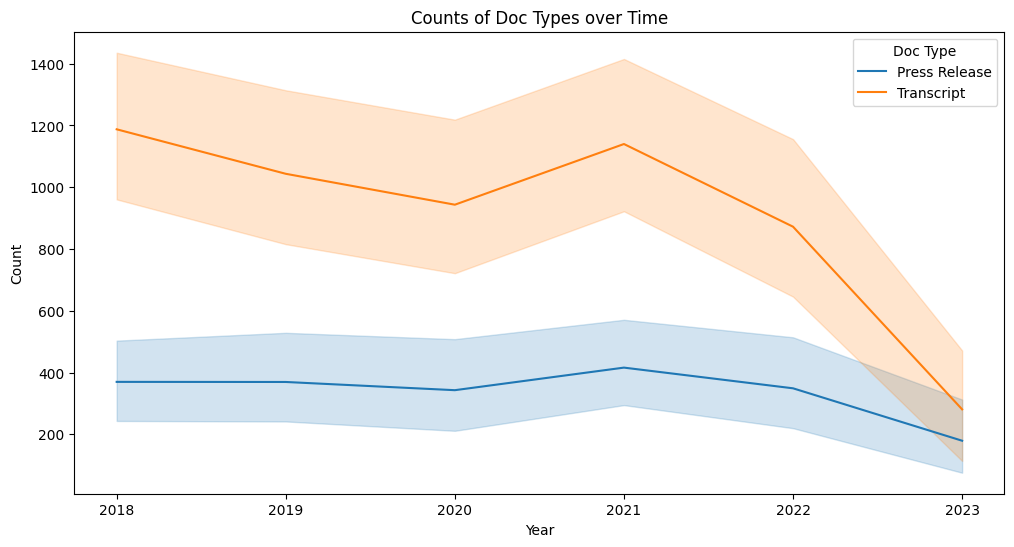

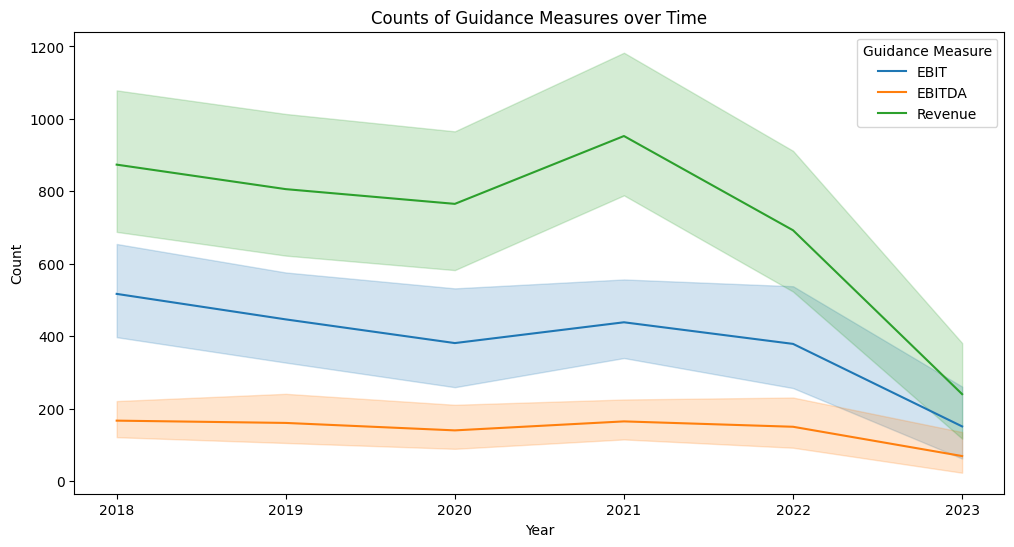

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Activation Date' column to datetime format
df_sentiment_large['Activation Date'] = pd.to_datetime(df_sentiment_large['Activation Date'])

# Group by 'Year', 'Month', 'Doc Type', and 'Guidance Measure', and count the occurrences
doc_type_counts = df_sentiment_large.groupby(['Year', 'Month', 'The Doc Type'])['Instrument'].count().reset_index()
guidance_measure_counts = df_sentiment_large.groupby(['Year', 'Month', 'Guidance Measure'])['Instrument'].count().reset_index()

# Plot the counts over time for Doc Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Instrument', hue='The Doc Type', data=doc_type_counts)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Doc Types over Time')
plt.legend(title='Doc Type')
plt.show()

# Plot the counts over time for Guidance Measure
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Instrument', hue='Guidance Measure', data=guidance_measure_counts)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Guidance Measures over Time')
plt.legend(title='Guidance Measure')
plt.show()


# Selecting only the relevant data

In [26]:
# Group by 'Month' and 'Year' and count the occurrences
doc_counts_by_month_year = df_sentiment_large.groupby(['Month', 'Year']).size().reset_index(name='Count')

# Print the result
doc_counts_by_month_year

,Month,Year,Count
0,1,2018,1507
1,1,2019,1956
2,1,2020,2024
3,1,2021,1699
4,1,2022,1643
...,...,...,...
62,12,2018,618
63,12,2019,742
64,12,2020,733
65,12,2021,833


# EBITDA RELATED - for the target variable ev/ebitda we take only this

In [29]:
import pandas as pd

# Select rows where "Guidance Measure" is "EBITDA"
ebitda_related = df_sentiment_large[df_sentiment_large["Guidance Measure"] == "EBITDA"]

# Print the resulting dataframe
ebitda_related

,Instrument,Activation Date,Guidance Measure,Guidance High Value,Guidance Low Value,Guidance Text,The Doc Type,Year,Month,text_length
12,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,6.301745e+09,6.195833e+09,This strategic addition to our business is exp...,Transcript,2022,2,196
18,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,NaN,NaN,This strategic addition to our business is exp...,Transcript,2022,2,196
24,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,4.409020e+09,4.251550e+09,This strategic addition to our business is exp...,Transcript,2022,2,196
30,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,NaN,NaN,This strategic addition to our business is exp...,Transcript,2022,2,196
106,CHRW.OQ,2023-04-26 17:00:00+00:00,EBITDA,NaN,NaN,"As you would expect, the cash that we used to ...",Transcript,2023,4,276
...,...,...,...,...,...,...,...,...,...,...
87443,AVY.N,2020-07-27 13:00:00+00:00,EBITDA,NaN,NaN,"As I mentioned at the end there, we expect our...",Transcript,2020,7,222
87444,AVY.N,2020-04-29 13:00:00+00:00,EBITDA,NaN,NaN,"And we'll continue, of course, if it goes deep...",Transcript,2020,4,448
87461,AVY.N,2020-07-27 13:00:00+00:00,EBITDA,NaN,NaN,"As I mentioned at the end there, we expect our...",Transcript,2020,7,222
87462,AVY.N,2020-04-29 13:00:00+00:00,EBITDA,NaN,NaN,"And we'll continue, of course, if it goes deep...",Transcript,2020,4,448


# Revenue related

In [30]:
import pandas as pd

# Select rows where "Guidance Measure" is "EBITDA"
revenue_related = df_sentiment_large[df_sentiment_large["Guidance Measure"] == "Revenue"]
revenue_related

,Instrument,Activation Date,Guidance Measure,Guidance High Value,Guidance Low Value,Guidance Text,The Doc Type,Year,Month,text_length
2,POOL.OQ,2022-10-20 11:00:00+00:00,Revenue,NaN,NaN,I mean you've had years of successful capacity...,Transcript,2022,10,120
3,POOL.OQ,2022-02-17 11:00:00+00:00,Revenue,5.932538e+09,5.808943e+09,Best-in-class tools such as a point-of-sale sy...,Transcript,2022,2,411
6,POOL.OQ,2022-10-20 11:00:00+00:00,Revenue,6.301745e+09,6.195833e+09,I mean you've had years of successful capacity...,Transcript,2022,10,120
7,POOL.OQ,2022-02-17 11:00:00+00:00,Revenue,6.301745e+09,6.195833e+09,Best-in-class tools such as a point-of-sale sy...,Transcript,2022,2,411
10,POOL.OQ,2022-10-20 11:00:00+00:00,Revenue,6.301745e+09,6.195833e+09,I mean you've had years of successful capacity...,Transcript,2022,10,120
...,...,...,...,...,...,...,...,...,...,...
87618,AVY.N,2018-01-31 06:45:00+00:00,Revenue,NaN,NaN,"EPS growth, while further increasing our level...",Press Release,2018,1,68
87619,AVY.N,2018-07-24 12:00:00+00:00,Revenue,NaN,NaN,The Industrial and Healthcare Materials segmen...,Transcript,2018,7,85
87622,AVY.N,2018-04-25 12:00:00+00:00,Revenue,NaN,NaN,"First off, Mitch or Greg, can you remind us wh...",Transcript,2018,4,95
87623,AVY.N,2018-02-28 11:30:00+00:00,Revenue,NaN,NaN,"Between these 2 key catalysts, it represents n...",Transcript,2018,2,104


# Pre-processing : ebitda_related Df

In [31]:
ebitda_related.head(3)

,Instrument,Activation Date,Guidance Measure,Guidance High Value,Guidance Low Value,Guidance Text,The Doc Type,Year,Month,text_length
12,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,6.301745e+09,6.195833e+09,This strategic addition to our business is exp...,Transcript,2022,2,196
18,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,NaN,NaN,This strategic addition to our business is exp...,Transcript,2022,2,196
24,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,4.409020e+09,4.251550e+09,This strategic addition to our business is exp...,Transcript,2022,2,196


In [32]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'Guidance Text' column
ebitda_related['preprocessed_text'] = ebitda_related['Guidance Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-32-dc69b18287a6>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebitda_related['preprocessed_text'] = ebitda_related['Guidance Text'].apply(preprocess_text)


In [33]:
ebitda_related.head(3)

,Instrument,Activation Date,Guidance Measure,Guidance High Value,Guidance Low Value,Guidance Text,The Doc Type,Year,Month,text_length,preprocessed_text
12,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,6.301745e+09,6.195833e+09,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...
18,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,NaN,NaN,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...
24,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,4.409020e+09,4.251550e+09,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...


# FinBERT on my sentiment

In [35]:
df = ebitda_related

In [36]:
#summurize the long parts

df['text_length'] = df['Guidance Text'].apply(lambda x: len(str(x)))

long_texts = df[df['Guidance Text'].apply(lambda x: len(str(x)) > 512)]
print(f"Number of texts longer than 512 characters: {len(long_texts)}")

Number of texts longer than 512 characters: 0


<ipython-input-36-b89c94c35598>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['Guidance Text'].apply(lambda x: len(str(x)))


In [37]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

df['num_tokens'] = df['Guidance Text'].apply(lambda x: len(tokenizer.encode(str(x))))

long_token_texts = df[df['num_tokens'] > 512]

print(f"Number of texts with more than 512 tokens: {len(long_token_texts)}")

Number of texts with more than 512 tokens: 0


<ipython-input-37-c9de4d6f46a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_tokens'] = df['Guidance Text'].apply(lambda x: len(tokenizer.encode(str(x))))


In [38]:
from transformers import pipeline

# Create a summarization pipeline
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [39]:
def summarize_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Tokenize the text
        tokens = tokenizer.tokenize(text)

        # If the text is too long, summarize it
        if len(tokens) > 512:
            summary = summarizer(text, max_length=512, min_length=200, do_sample=False)
            return summary[0]['summary_text']
    # If the text is not a string, return it as is
    return text

In [40]:
df['Guidance Text'] = df['Guidance Text'].apply(summarize_text)

<ipython-input-40-6a486f2ebe1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Guidance Text'] = df['Guidance Text'].apply(summarize_text)


In [41]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'Guidance Text' column
df['preprocessed_text'] = df['Guidance Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-41-ae0cb0769fe0>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df['Guidance Text'].apply(preprocess_text)


# TONE - ESG - FLS

In [42]:
#example
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",
             "growth is strong and we have plenty of liquidity",
             "there are doubts about our finances",
             "profits are flat"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889442920684814}]


In [43]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Load the pre-trained model and tokenizer
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

# Create a sentiment-analysis pipeline
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

#strign and nan
df['preprocessed_text'] = df['preprocessed_text'].fillna('').astype(str)

# Apply the pipeline to your DataFrame column
df['sentiment_results'] = df['preprocessed_text'].apply(lambda x: nlp(x)[0])

<ipython-input-43-6ff7c75a48a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df['preprocessed_text'].fillna('').astype(str)
<ipython-input-43-6ff7c75a48a1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_results'] = df['preprocessed_text'].apply(lambda x: nlp(x)[0])


In [44]:
# If you want just the label, you can extract it like this
df['sentiment_label'] = df['sentiment_results'].apply(lambda x: x['label'])

# If you want the classification score, you can extract it like this
df['sentiment_score'] = df['sentiment_results'].apply(lambda x: x['score'])

<ipython-input-44-5e73bb6ab03d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = df['sentiment_results'].apply(lambda x: x['label'])
<ipython-input-44-5e73bb6ab03d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['sentiment_results'].apply(lambda x: x['score'])


In [45]:
df.head(3)

,Instrument,Activation Date,Guidance Measure,Guidance High Value,Guidance Low Value,Guidance Text,The Doc Type,Year,Month,text_length,preprocessed_text,num_tokens,sentiment_results,sentiment_label,sentiment_score
12,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,6.301745e+09,6.195833e+09,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",Positive,0.820102
18,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,NaN,NaN,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",Positive,0.820102
24,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,4.409020e+09,4.251550e+09,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",Positive,0.820102


In [46]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Load the pre-trained model and tokenizer
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-esg', num_labels=4)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-esg')

# Create a sentiment-analysis pipeline
nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)

# Make sure your 'Guidance Text' column is a string and not missing any values
#df['Guidance Text'] = df['Guidance Text'].fillna('').astype(str)

# Apply the pipeline to your DataFrame column
df['esg_classification'] = df['preprocessed_text'].apply(lambda x: nlp(x)[0])

# If you want just the label, you can extract it like this
df['esg_classification_label'] = df['esg_classification'].apply(lambda x: x['label'])

# If you want the classification score, you can extract it like this
df['esg_classification_score'] = df['esg_classification'].apply(lambda x: x['score'])

<ipython-input-46-2db42cb2a4ab>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['esg_classification'] = df['preprocessed_text'].apply(lambda x: nlp(x)[0])
<ipython-input-46-2db42cb2a4ab>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['esg_classification_label'] = df['esg_classification'].apply(lambda x: x['label'])
<ipython-input-46-2db42cb2a4ab>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [47]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Load the pre-trained model and tokenizer
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-fls', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-fls')

# Create a sentiment-analysis pipeline
nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)

# Prepare lists to hold classification results
classification_results = []
classification_labels = []
classification_scores = []

# Process text and store results
for text in df['preprocessed_text']:
    classification = nlp(text)[0]
    classification_results.append(classification)
    classification_labels.append(classification['label'])
    classification_scores.append(classification['score'])

# Add results to DataFrame
df['fls_classification'] = classification_results
df['fls_classification_label'] = classification_labels
df['fls_classification_score'] = classification_scores

<ipython-input-47-ccb11df6d6ef>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fls_classification'] = classification_results
<ipython-input-47-ccb11df6d6ef>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fls_classification_label'] = classification_labels
<ipython-input-47-ccb11df6d6ef>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

## Cleaning

In [48]:
df = df.drop(['Guidance High Value', 'Guidance Low Value'], axis=1)
df.columns

Index(['Instrument', 'Activation Date', 'Guidance Measure', 'Guidance Text',
       'The Doc Type', 'Year', 'Month', 'text_length', 'preprocessed_text',
       'num_tokens', 'sentiment_results', 'sentiment_label', 'sentiment_score',
       'esg_classification', 'esg_classification_label',
       'esg_classification_score', 'fls_classification',
       'fls_classification_label', 'fls_classification_score'],
      dtype='object')

In [51]:
df.head(3)

,Instrument,Activation Date,Guidance Measure,Guidance Text,The Doc Type,Year,Month,text_length,preprocessed_text,num_tokens,sentiment_results,sentiment_label,sentiment_score,esg_classification,esg_classification_label,esg_classification_score,fls_classification,fls_classification_label,fls_classification_score
12,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",Positive,0.820102,"{'label': 'None', 'score': 0.9865126609802246}",None,0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",Specific FLS,0.890123
18,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",Positive,0.820102,"{'label': 'None', 'score': 0.9865126609802246}",None,0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",Specific FLS,0.890123
24,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,196,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",Positive,0.820102,"{'label': 'None', 'score': 0.9865126609802246}",None,0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",Specific FLS,0.890123


In [ ]:
#df.to_csv('sp500_sentiment')

Mapping

In [60]:
# Define a mapping dictionary for sentiment labels

#SENTIMENT
label_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': 2}
df['sentiment_numerical'] = df['sentiment_label'].map(label_mapping)


#ESG
esg_mapping = {'Environmental': 0, 'Social': 2, 'Governance': 3, 'None': 4}
df['esg_numerical'] = df['esg_classification_label'].map(esg_mapping)

#FLS
fls_mapping = {'Non-specific FLS': 0,'Specific FLS': 1, 'Not FLS': 2}
df['fls_numerical'] = df['fls_classification_label'].map(fls_mapping)

df

KeyError: ignored

In [59]:
# Drop columns
columns_to_drop = ['Activation Date','text_length','Activation Date', 'sentiment_label',
                   'fls_classification_label','esg_classification_label','esg_classification','fls_classification',]
df = df.drop(columns=columns_to_drop)

KeyError: ignored

In [61]:
df.columns

Index(['Instrument', 'Activation Date', 'Guidance Measure', 'Guidance Text',
       'The Doc Type', 'Year', 'Month', 'preprocessed_text', 'num_tokens',
       'sentiment_results', 'sentiment_score', 'esg_classification',
       'esg_classification_score', 'fls_classification',
       'fls_classification_score', 'sentiment_numerical', 'esg_numerical',
       'fls_numerical'],
      dtype='object')

In [62]:
df.head(3)

,Instrument,Activation Date,Guidance Measure,Guidance Text,The Doc Type,Year,Month,preprocessed_text,num_tokens,sentiment_results,sentiment_score,esg_classification,esg_classification_score,fls_classification,fls_classification_score,sentiment_numerical,esg_numerical,fls_numerical
12,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",0.820102,"{'label': 'None', 'score': 0.9865126609802246}",0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",0.890123,1,4,1
18,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",0.820102,"{'label': 'None', 'score': 0.9865126609802246}",0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",0.890123,1,4,1
24,POOL.OQ,2022-02-17 11:00:00+00:00,EBITDA,This strategic addition to our business is exp...,Transcript,2022,2,strategic addition business expected add appro...,44,"{'label': 'Positive', 'score': 0.8201017379760...",0.820102,"{'label': 'None', 'score': 0.9865126609802246}",0.986513,"{'label': 'Specific FLS', 'score': 0.890123426...",0.890123,1,4,1


In [64]:
df.shape

(9866, 18)

In [66]:
df.to_csv('sp500_text_classified.csv')